In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

# 포맷
plt.style.use('dark_background')
sns.set_theme(style="darkgrid", rc={
    "axes.facecolor": "#1e1e1e",
    "grid.color": "#3c3c3c",
    "figure.facecolor": "#1e1e1e",
    "xtick.color": "white",  # x축 눈금 색상
    "ytick.color": "white",  # y축 눈금 색상
    "text.color": "white"
})
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import data.data_loader as dl

df = dl.get_final_analysis_df()

# 1. 선진국/개도국 분류 (상위 25%를 선진국으로 정의)
df['Status'] = df.groupby('Year')['gdp_per_capita'].transform(
    lambda x: pd.qcut(x, [0, 0.75, 1.0], labels=['개발도상국', '선진국'])
)

# 2. 결과 확인: 경제 수준과 개최 여부가 메달에 미치는 영향
analysis_result = df.groupby(['Status', 'is_host'])['Medal'].agg(['mean', 'median', 'count'])
print("=== 분석 결과 요약 ===")
print(analysis_result)

=== 분석 결과 요약 ===
                     mean  median  count
Status is_host                          
개발도상국  False     7.599078     3.0    651
       True     27.230769    23.0     13
선진국    False    19.241860    11.0    215
       True     50.461538    34.0     13


=== 분석 결과 요약 ===
                     mean  median  count
Status is_host                          
개발도상국  False     7.599078     3.0    651
       True     27.230769    23.0     13
선진국    False    19.241860    11.0    215
       True     50.461538    34.0     13


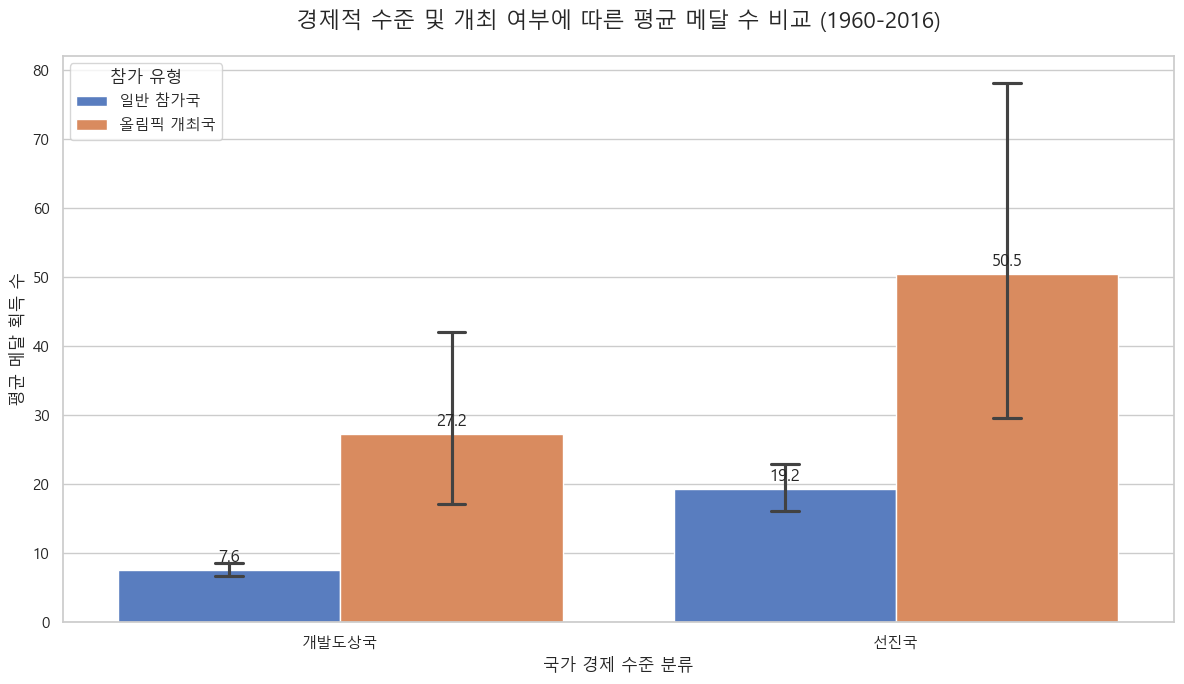

In [8]:
# 1. 데이터 로드
df = dl.get_final_analysis_df()

# 2. 선진국/개도국 분류 (상위 25% 선진국)
# 여기서 바로 한글 라벨을 적용합니다.
df['Status'] = df.groupby('Year')['gdp_per_capita'].transform(
    lambda x: pd.qcut(x, [0, 0.75, 1.0], labels=['개발도상국', '선진국'], duplicates='drop')
)

# 3. 분석 결과 요약 출력
analysis_result = df.groupby(['Status', 'is_host'])['Medal'].agg(['mean', 'median', 'count'])
print("=== 분석 결과 요약 ===")
print(analysis_result)

# --- 시각화 섹션 ---

# 4. 한글 폰트 설정 (Windows 맑은 고딕 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 5. 시각화용 데이터 복사 및 변환
# True/False를 한글로 변환하여 그래프에 바로 나타나게 합니다.
plot_df = df.copy()
plot_df['is_host'] = plot_df['is_host'].map({True: '올림픽 개최국', False: '일반 참가국'})

# 6. 그래프 생성
sns.set_theme(style="whitegrid", font='Malgun Gothic')
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=plot_df,
    x='Status',
    y='Medal',
    hue='is_host',
    palette='muted',
    capsize=.1
)

# 7. 그래프 디테일 (한글 라벨링)
plt.title('경제적 수준 및 개최 여부에 따른 평균 메달 수 비교 (1960-2016)', fontsize=16, pad=20)
plt.xlabel('국가 경제 수준 분류', fontsize=12)
plt.ylabel('평균 메달 획득 수', fontsize=12)
plt.legend(title='참가 유형')

# 8. 막대 위에 숫자 표시 (Annotate)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

plt.tight_layout()

plt.savefig('host_effect_by_GDP.png', dpi=200,facecolor='#1e1e1e')
plt.show()

In [5]:
# 위에 포함된 국가 갯수 (26개: 개발도상국 13 + 선진국 13) 확인용.
# 실제 1960 ~ 2016까지 개최된 올림픽은 30개이나, GDP 데이터 누락 등으로 부분 누락.

# 개최국(True) 데이터만 따로 추출
host_cases = df[df['is_host'] == True].copy()

# 보기 좋게 연도별로 정렬하여 출력
# NOC(국가코드), Year(연도), Medal(메달수), gdp_per_capita(1인당 GDP)
print("=== 분석에 포함된 개최국(True) 리스트 ===")
print(host_cases[['Year', 'NOC', 'Medal', 'gdp_per_capita']].sort_values('Year'))

# 만약 선진국/개도국 분류(Status)까지 보고 싶다면
# print(host_cases[['Year', 'NOC', 'Status', 'Medal']].sort_values('Year'))

=== 분석에 포함된 개최국(True) 리스트 ===
     Year  NOC  Medal  gdp_per_capita
19   1960  ITA     37      836.905850
37   1960  USA     81     2999.864872
44   1964  AUT     12     1275.457153
60   1964  JPN     29      902.867722
96   1968  FRA     24     2518.158256
107  1968  MEX      9      615.922912
145  1972  JPN     32     3031.438606
170  1976  AUT      7     5656.145138
173  1976  CAN     14     8838.947107
240  1980  USA     12    12574.791506
288  1984  USA    181    17121.225485
292  1984  YUG     19             NaN
299  1988  CAN     15    19012.572328
318  1988  KOR     33     4888.685092
354  1992  ESP     23    16100.679943
360  1992  FRA     38    23615.016857
414  1994  NOR     23    29315.809234
485  1996  USA    101    29967.712718
498  1998  JPN     10    32423.755613
510  2000  AUS     58    21908.996802
596  2002  USA     34    37997.759657
623  2004  GRE     16    21449.255276
672  2006  ITA     11    33537.128699
697  2008  CHN    100     3523.443021
763  2010  CAN     2